In [1]:
import numpy as np

from sklearn import cluster
from sklearn.decomposition import RandomizedPCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import matplotlib.image as mpimg

In [3]:
raster = mpimg.imread("image5.jpg")

In [594]:
width, height, depth = raster.shape

In [595]:
raster.shape

(1227, 1600, 3)

In [596]:
reshaped_raster = np.reshape(raster, (width , height * depth))

In [597]:
print(reshaped_raster.shape)

(1227, 4800)


C:\Users\Xiaohe\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


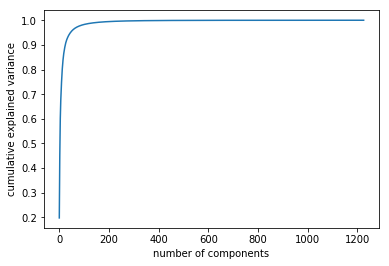

In [598]:
pca = RandomizedPCA()
projected = pca.fit_transform(reshaped_raster)
#print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [599]:
pca = PCA(5)
pca = pca.fit(reshaped_raster)
projected = pca.transform(reshaped_raster)
#print(pca.explained_variance_ratio_)
print(pca.components_.shape)

(5, 4800)


In [600]:
compressed = pca.inverse_transform(projected)

In [601]:
# print(raster.shape)
# print(projected.shape)
# print(compressed.shape)

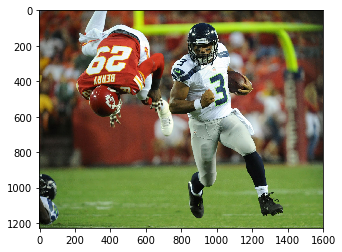

<Figure size 432x288 with 0 Axes>

In [602]:
import matplotlib.pyplot as plt
plt.imshow(raster)
plt.show()
plt.draw()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


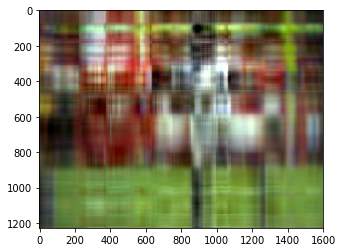

In [603]:
compressedImage = compressed.reshape(width,height,depth)
plt.imshow(compressedImage/255)

In [604]:
plt.imsave('image5PCA5.png',compressedImage/255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
